# song_kmeans_recr 

## Import packages, get url, and explore page

In [42]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from random import randint
import matplotlib.pyplot as plt


In [2]:
url = "https://www.billboard.com/charts/hot-100/"
response = requests.get(url)
print(response.content)

b'<!DOCTYPE html>\n<!--[if IE 6]>\n<html id="ie6" lang="en-US">\n<![endif]-->\n<!--[if IE 7]>\n<html id="ie7" lang="en-US">\n<![endif]-->\n<!--[if IE 8]>\n<html id="ie8" lang="en-US">\n<![endif]-->\n<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->\n<html lang="en-US">\n<!--<![endif]-->\n<head>\n\t<meta charset="UTF-8"/>\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t<meta name="theme-color" content="#ffffff">\n\t<meta name="viewport" content="width=device-width, initial-scale=1.0"/>\t\n<!-- Add to home screen for iOS -->\n<meta name="apple-mobile-web-app-status-bar-style" content="black-translucent">\n<link rel="apple-touch-icon" sizes="180x180" href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png">\n\n<!-- Tile icons for Windows -->\n<meta name="msapplication-config" content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml">\n<meta name="msapplication-TileImage" c

In [3]:
soup = bs(response.content)

In [4]:
soup.title.get_text()

'Billboard Hot 100 – Billboard'

In [5]:
soup.find("p").get_text()

'THE WEEK’S MOST POPULAR ARTISTS ACROSS ALL GENRES, RANKED BY ALBUM AND TRACK SALES AS MEASURED BY LUMINATE, RADIO AIRPLAY AUDIENCE IMPRESSIONS AS MEASURED BY LUMINATE, STREAMING ACTIVITY DATA FROM ONLINE MUSIC SOURCES TRACKED BY LUMINATE.'

## Load top songs into pandas frame

In [6]:
soup.select(".c-title.a-no-trucate") # select top songs [from exploring the website's html in the browser]

[<h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 u-font-size-23@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-245 u-max-width-230@tablet-only u-letter-spacing-0028@tablet" id="title-of-a-story">
 
 	
 	
 		
 					As It Was		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only" id="title-of-a-story">
 
 	
 	
 		
 					About Damn Time		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only" id="title-of-a-story">
 
 	
 	
 		
 					First Class		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-

In [7]:
soup.select(".c-label.a-no-trucate") # soup select top artists [from exploring the website's html in the browser]

[<span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only u-font-size-20@tablet">
 	
 	Harry Styles
 </span>,
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only">
 	
 	Lizzo
 </span>,
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only">
 	
 	Jack Harlow
 </span>,
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tabl

In [8]:
artists = []
songs   = []
top_sa = {}

In [9]:
LEN = len(soup.select(".c-title.a-no-trucate"))

In [10]:
LEN == 100

True

In [11]:
for idx in range (0,LEN):
    s = str(soup.select(".c-title.a-no-trucate")[idx].get_text(strip=True))
    a = str(soup.select(".c-label.a-no-trucate")[idx].get_text(strip=True))
    artists.append(a)
    songs.append(s)

In [12]:
top_sa =  {"Artist" : artists, "Song" : songs }

In [13]:
top_sa_df = pd.DataFrame(top_sa)
top_sa_df

,Artist,Song
0,Harry Styles,As It Was
1,Lizzo,About Damn Time
2,Jack Harlow,First Class
3,Kate Bush,Running Up That Hill (A Deal With God)
4,Future Featuring Drake & Tems,Wait For U
...,...,...
95,Jake Owen,Best Thing Since Backroads
96,"Lil Baby, 42 Dugg & Veeze",U-Digg
97,Sia,Unstoppable
98,Yeat,Rich Minion


In [14]:
def make_lower(df, col):
    '''lower the case of record in a field '''
    return df[col].str.lower()


In [ ]:
selected_song = input('Please select a song: ')

In [ ]:
if selected_song in list(top_sa_df["Song"]):
    r = randint(0, len(top_sa_df.index))
    print("Other song recommended: ", top_sa_df.iloc[r, 1])
else:
    print(colored("The selected song is not in the top 100 charts!", attrs=['bold'])) 

## Kmeans

In [106]:
df = pd.read_csv('all_music_data.csv') # read the data
df.dtypes # data breakdown

song_title           object
artist               object
id                   object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
dtype: object

In [105]:
print("Lines:\t\t{}".format(df.shape[0]))
print("Columns:\t{}".format(df.shape[1]))

Lines:		7317
Columns:	20


In [103]:
df.head()

,song_title,artist,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,Hey Ya!,Outkast,0JFx4l1JZJ6XtMAtlCMiqF,0.657,0.883,4,-6.778,0,0.0526,0.0349,0.000000,0.306,0.966,79.397,audio_features,spotify:track:0JFx4l1JZJ6XtMAtlCMiqF,https://api.spotify.com/v1/tracks/0JFx4l1JZJ6X...,https://api.spotify.com/v1/audio-analysis/0JFx...,228573,4
1,"No Woman, No Cry",Fugees,5bUVHuzQh5mkvMPjUU074i,0.846,0.326,0,-13.909,1,0.1520,0.0134,0.000040,0.280,0.367,88.988,audio_features,spotify:track:5bUVHuzQh5mkvMPjUU074i,https://api.spotify.com/v1/tracks/5bUVHuzQh5mk...,https://api.spotify.com/v1/audio-analysis/5bUV...,273093,4
2,Can You Feel It,The Jacksons,1XqgxhR3FcJXzFiSG8m6oL,0.892,0.638,6,-7.468,0,0.0488,0.0445,0.000476,0.202,0.892,125.359,audio_features,spotify:track:1XqgxhR3FcJXzFiSG8m6oL,https://api.spotify.com/v1/tracks/1XqgxhR3FcJX...,https://api.spotify.com/v1/audio-analysis/1Xqg...,358373,4
3,Foolish,Ashanti,5wXgj9h0Pc36Rcgwf2qd7A,0.620,0.701,0,-5.742,1,0.0624,0.3160,0.000000,0.147,0.771,90.059,audio_features,spotify:track:5wXgj9h0Pc36Rcgwf2qd7A,https://api.spotify.com/v1/tracks/5wXgj9h0Pc36...,https://api.spotify.com/v1/audio-analysis/5wXg...,229013,4
4,Arigato Interlude,Ms. Lauryn Hill,3abz5HTatP9iv5p8Nm5IT0,0.000,0.978,10,-9.615,1,0.0000,0.7990,0.002280,0.951,0.000,0.000,audio_features,spotify:track:3abz5HTatP9iv5p8Nm5IT0,https://api.spotify.com/v1/tracks/3abz5HTatP9i...,https://api.spotify.com/v1/audio-analysis/3abz...,34182,0


In [27]:
# statistical distribution of the data
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,7317.000000,7317.000000,7317.000000,7317.000000,7317.000000,7317.000000,7317.000000,7317.000000,7317.000000,7317.000000,7317.000000,7.317000e+03,7317.000000
mean,0.587391,0.607030,5.295476,-8.326448,0.634960,0.091835,0.285053,0.044119,0.208400,0.533108,114.581336,2.428530e+05,3.913489
std,0.168777,0.221907,3.588778,3.553579,0.481474,0.111609,0.300661,0.161981,0.181537,0.253073,29.171158,9.051329e+04,0.399945
min,0.000000,0.001140,0.000000,-40.230000,0.000000,0.000000,0.000008,0.000000,0.015700,0.000000,0.000000,8.867000e+03,0.000000
25%,0.473000,0.462000,2.000000,-9.753000,0.000000,0.033100,0.039300,0.000000,0.096200,0.328000,93.010000,2.049470e+05,4.000000
50%,0.602000,0.628000,5.000000,-7.727000,1.000000,0.044700,0.156000,0.000008,0.134000,0.549000,108.873000,2.376530e+05,4.000000
75%,0.714000,0.784000,8.000000,-6.077000,1.000000,0.091200,0.469000,0.000716,0.268000,0.739000,130.618000,2.692670e+05,4.000000
max,0.969000,0.998000,11.000000,-1.492000,1.000000,0.948000,0.996000,0.964000,0.994000,0.985000,216.160000,4.650486e+06,5.000000


In [112]:
# unique values
print("\nUnique values: \n")
print(df.nunique().sort_values())


Unique values: 

type                   1
mode                   2
time_signature         5
key                   12
danceability         794
energy               978
valence             1086
speechiness         1106
liveness            1259
artist              1803
acousticness        2197
instrumentalness    2461
song_title          4003
loudness            4528
duration_ms         4885
tempo               5724
id                  6912
uri                 6912
track_href          6912
analysis_url        6912
dtype: int64


In [116]:
# artist, title and id distribution
df[['song_title','artist', 'id']].describe(include="O")

,song_title,artist,id
count,7317,7317,7317
unique,4003,1803,6912
top,Killing Me Softly With His Song,Jeff Buckley,1Xa3OSeGKNO6Uq2D3ZbZOJ
freq,35,360,4


In [118]:
# Popular artists
print("Top Artists")
df['artist'].value_counts()[:10]

Top Artists


Jeff Buckley       360
Ms. Lauryn Hill    169
Fugees             125
Nas                106
Gary Lucas         105
Black Thought       91
Teyana Taylor       81
Mariah Carey        79
Joss Stone          79
Santana             56
Name: artist, dtype: int64

In [32]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [120]:
# creating a dataframe without the categorical features
numerics = ['int64','float64']
num_df = df.select_dtypes(include=numerics)
num_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.657,0.883,4,-6.778,0,0.0526,0.0349,0.000000,0.306,0.966,79.397,228573,4
1,0.846,0.326,0,-13.909,1,0.1520,0.0134,0.000040,0.280,0.367,88.988,273093,4
2,0.892,0.638,6,-7.468,0,0.0488,0.0445,0.000476,0.202,0.892,125.359,358373,4
3,0.620,0.701,0,-5.742,1,0.0624,0.3160,0.000000,0.147,0.771,90.059,229013,4
4,0.000,0.978,10,-9.615,1,0.0000,0.7990,0.002280,0.951,0.000,0.000,34182,0


In [37]:
# data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [122]:
X = pd.DataFrame(scaler.fit_transform(num_df))
X.columns = num_df.columns
X = scaler.fit_transform(num_df)

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 

Training a K-Means model with 21 clusters! 

Training a K-Means model with 22 clusters! 

Training a K-Means model with 23 clusters! 

Training a K-Means

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

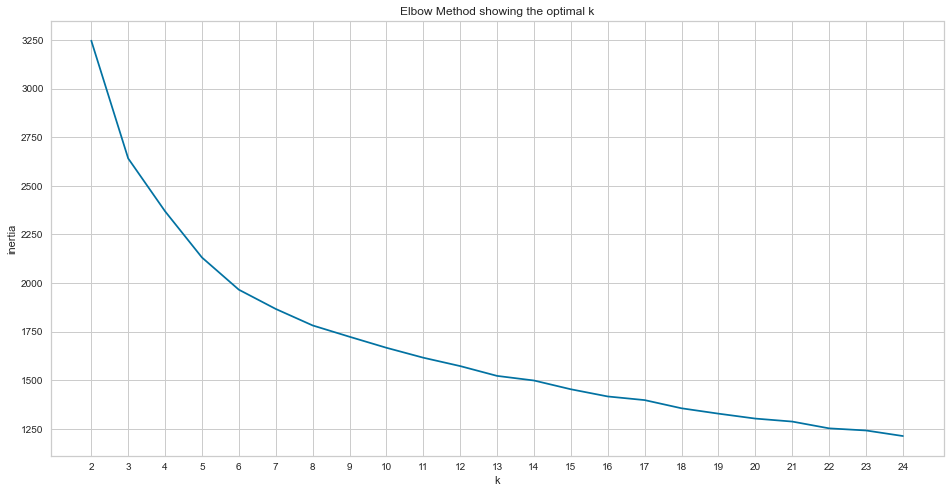

In [123]:
K = range(2, 25)

inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

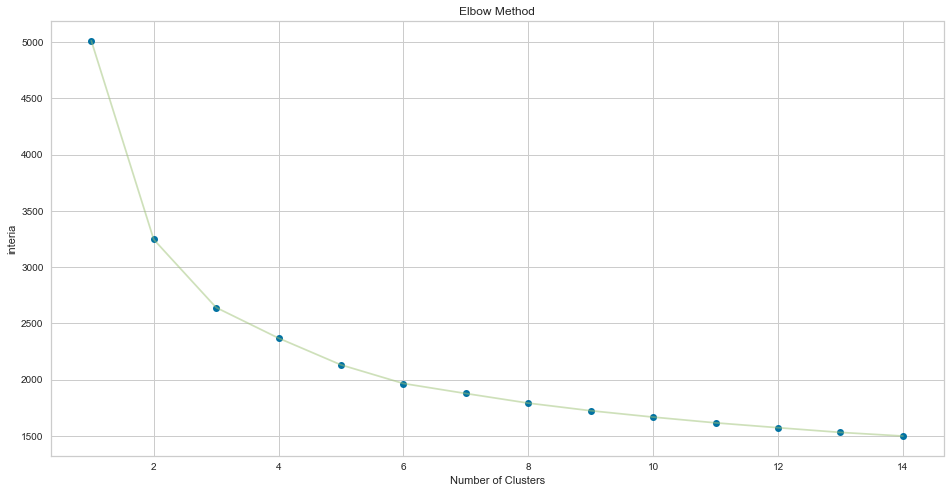

In [141]:
inertia = []
kmax = 15
for i in range(1,kmax):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 8, random_state = 1234)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(range(1,kmax), inertia, 'o')
plt.plot(range(1 , kmax) , inertia , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('interia')
plt.savefig('Elbow_Method.png')
plt.show()

In [142]:
inertia

[5013.075137045865,
 3246.2300208747733,
 2640.9575581286263,
 2368.974044814553,
 2131.4087039862,
 1965.8206165188376,
 1876.932871351565,
 1791.4834645466563,
 1723.8382776530273,
 1667.1683486493698,
 1616.0817903106897,
 1572.9736232160399,
 1531.1399799844567,
 1498.858950318127]

In [131]:
import pickle
from sklearn.metrics import silhouette_score

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

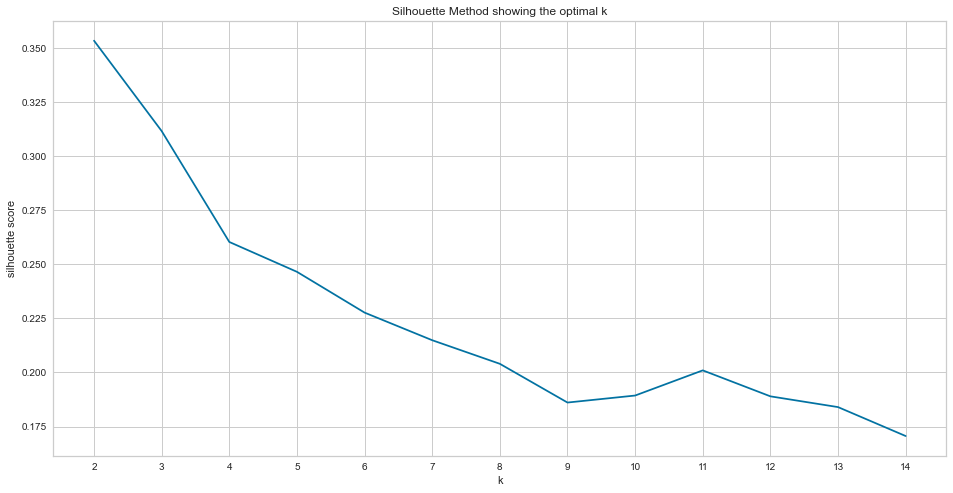

In [140]:
K = range(2, 15)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters = k, random_state = 1234) # init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1234)
    kmeans.fit(X)
    
    silhouette.append(silhouette_score(X, kmeans.predict(X)))

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')


In [135]:
from yellowbrick.cluster import SilhouetteVisualizer

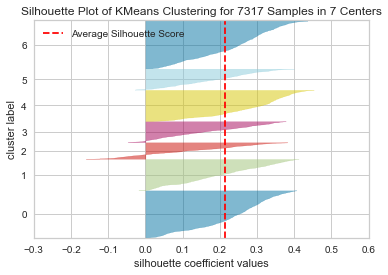

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 7317 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [172]:
model = KMeans(7, random_state=1234)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()  

In [173]:
# instantiating model
NUM_CLUSTERS = 7
kmeans = KMeans(n_clusters = NUM_CLUSTERS, random_state = 1234)
                #init = 'k-means++', max_iter = 300, n_init = 10, 
y_kmeans = kmeans.fit_predict(X)

In [174]:
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['k_cluster']

# predictions as a df
print(kmeans.shape)
kmeans

(7317, 1)


,k_cluster
0,1
1,0
2,1
3,0
4,5
...,...
7312,3
7313,2
7314,4
7315,1


In [175]:
# concatenating the cluster column to the dataframe
clst_df = pd.concat([df, kmeans], axis=1)

# checking the dataframe
print(clst_df.shape)
clst_df.head()

(7317, 21)


,song_title,artist,id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,k_cluster
0,Hey Ya!,Outkast,0JFx4l1JZJ6XtMAtlCMiqF,0.657,0.883,4,-6.778,0,0.0526,0.0349,...,0.306,0.966,79.397,audio_features,spotify:track:0JFx4l1JZJ6XtMAtlCMiqF,https://api.spotify.com/v1/tracks/0JFx4l1JZJ6X...,https://api.spotify.com/v1/audio-analysis/0JFx...,228573,4,1
1,"No Woman, No Cry",Fugees,5bUVHuzQh5mkvMPjUU074i,0.846,0.326,0,-13.909,1,0.1520,0.0134,...,0.280,0.367,88.988,audio_features,spotify:track:5bUVHuzQh5mkvMPjUU074i,https://api.spotify.com/v1/tracks/5bUVHuzQh5mk...,https://api.spotify.com/v1/audio-analysis/5bUV...,273093,4,0
2,Can You Feel It,The Jacksons,1XqgxhR3FcJXzFiSG8m6oL,0.892,0.638,6,-7.468,0,0.0488,0.0445,...,0.202,0.892,125.359,audio_features,spotify:track:1XqgxhR3FcJXzFiSG8m6oL,https://api.spotify.com/v1/tracks/1XqgxhR3FcJX...,https://api.spotify.com/v1/audio-analysis/1Xqg...,358373,4,1
3,Foolish,Ashanti,5wXgj9h0Pc36Rcgwf2qd7A,0.620,0.701,0,-5.742,1,0.0624,0.3160,...,0.147,0.771,90.059,audio_features,spotify:track:5wXgj9h0Pc36Rcgwf2qd7A,https://api.spotify.com/v1/tracks/5wXgj9h0Pc36...,https://api.spotify.com/v1/audio-analysis/5wXg...,229013,4,0
4,Arigato Interlude,Ms. Lauryn Hill,3abz5HTatP9iv5p8Nm5IT0,0.000,0.978,10,-9.615,1,0.0000,0.7990,...,0.951,0.000,0.000,audio_features,spotify:track:3abz5HTatP9iv5p8Nm5IT0,https://api.spotify.com/v1/tracks/3abz5HTatP9i...,https://api.spotify.com/v1/audio-analysis/3abz...,34182,0,5


In [176]:
clst_df.to_csv('df_clustered.csv', index=0)

In [177]:
# statistical distribution of the data in each column, for each cluster
clst_df.groupby("k_cluster").describe()

danceability                                                       \
                 count      mean       std     min      25%    50%      75%   
k_cluster                                                                     
0               1604.0  0.613536  0.156494  0.1410  0.51275  0.624  0.73325   
1               1057.0  0.650126  0.143281  0.1610  0.56100  0.671  0.75700   
2                557.0  0.478861  0.144210  0.0976  0.38300  0.485  0.59100   
3                707.0  0.435730  0.156829  0.0628  0.32600  0.413  0.54450   
4               1057.0  0.670387  0.146118  0.1850  0.57600  0.689  0.76900   
5                712.0  0.475806  0.150728  0.0000  0.37500  0.479  0.58700   
6               1623.0  0.618909  0.144780  0.1270  0.53000  0.630  0.71450   

                  energy            ... duration_ms            time_signature  \
             max   count      mean  ...         75%        max          count   
k_cluster                           ...                                         
0          0.967  1604.0  0.692148  ...   266363.25  4650486.0         1604.0   
1          0.944  1057.0  0.686371  ...   271333.00   969427.0         1057.0   
2          0.787   557.0  0.384821  ...   281400.00  1153773.0          557.0   
3          0.866   707.0  0.314681  ...   284473.00   763830.0          707.0   
4          0.969  1057.0  0.697685  ...   271027.00   747840.0         1057.0   
5          0.848   712.0  0.360032  ...   262710.00   828446.0          712.0   
6          0.964  1623.0  0.724163  ...   261827.00   650640.0         1623.0   

                                                        
               mean       std  min  25%  50%  75%  max  
k_cluster                                               
0          3.966334  0.297821  1.0  4.0  4.0  4.0  5.0  
1          3.965941  0.266099  1.0  4.0  4.0  4.0  5.0  
2          3.775583  0.666447  1.0  4.0  4.0  4.0  5.0  
3          3.688826  0.674864  1.0  3.0  4.0  4.0  5.0  
4          3.972564  0.250387  1.0  4.0  4.0  4.0  5.0  
5          3.786517  0.537681  0.0  4.0  4.0  4.0  5.0  
6          3.989526  0.146521  3.0  4.0  4.0  4.0  5.0  

[7 rows x 104 columns]

In [178]:
# checking number of songs in each cluster
clst_df['k_cluster'].value_counts()

6    1623
0    1604
1    1057
4    1057
5     712
3     707
2     557
Name: k_cluster, dtype: int64

In [179]:
# checking the songs in cluster 1
clst_df.loc[clst_df['k_cluster'] == 1][:5]

,song_title,artist,id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,k_cluster
0,Hey Ya!,Outkast,0JFx4l1JZJ6XtMAtlCMiqF,0.657,0.883,4,-6.778,0,0.0526,0.03490,...,0.3060,0.966,79.397,audio_features,spotify:track:0JFx4l1JZJ6XtMAtlCMiqF,https://api.spotify.com/v1/tracks/0JFx4l1JZJ6X...,https://api.spotify.com/v1/audio-analysis/0JFx...,228573,4,1
2,Can You Feel It,The Jacksons,1XqgxhR3FcJXzFiSG8m6oL,0.892,0.638,6,-7.468,0,0.0488,0.04450,...,0.2020,0.892,125.359,audio_features,spotify:track:1XqgxhR3FcJXzFiSG8m6oL,https://api.spotify.com/v1/tracks/1XqgxhR3FcJX...,https://api.spotify.com/v1/audio-analysis/1Xqg...,358373,4,1
7,Gettin' Some,Shawnna,4tLHsVB3rzaJcRfwFoMq91,0.825,0.586,4,-6.044,0,0.3360,0.09010,...,0.0635,0.611,78.030,audio_features,spotify:track:4tLHsVB3rzaJcRfwFoMq91,https://api.spotify.com/v1/tracks/4tLHsVB3rzaJ...,https://api.spotify.com/v1/audio-analysis/4tLH...,202760,4,1
20,Barbie Girl,Aqua,4tzRyCTpbOMpPUmIdPS7pZ,0.755,0.952,1,-4.420,0,0.0376,0.00921,...,0.4660,0.929,129.965,audio_features,spotify:track:4tzRyCTpbOMpPUmIdPS7pZ,https://api.spotify.com/v1/tracks/4tzRyCTpbOMp...,https://api.spotify.com/v1/audio-analysis/4tzR...,195040,4,1
22,X,Xzibit,6U2F6eV8KSAMpLrZsRaNzE,0.936,0.673,4,-3.051,0,0.2210,0.08490,...,0.1220,0.807,96.914,audio_features,spotify:track:6U2F6eV8KSAMpLrZsRaNzE,https://api.spotify.com/v1/tracks/6U2F6eV8KSAM...,https://api.spotify.com/v1/audio-analysis/6U2F...,255987,4,1


In [180]:
# checking the songs in  cluster 2
clst_df.loc[clst_df['k_cluster'] == 2][:5]

,song_title,artist,id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,k_cluster
6,Still Loving You,Scorpions,1pTyDGecdNtlm1PWuA46ZP,0.296,0.424,8,-8.667,0,0.0282,0.290,...,0.3950,0.106,103.567,audio_features,spotify:track:1pTyDGecdNtlm1PWuA46ZP,https://api.spotify.com/v1/tracks/1pTyDGecdNtl...,https://api.spotify.com/v1/audio-analysis/1pTy...,291773,4,2
9,Concrete,Teyana Taylor,3SNBX4awHPJFnFzVf3nD5N,0.716,0.568,4,-7.016,0,0.1980,0.467,...,0.0934,0.265,113.954,audio_features,spotify:track:3SNBX4awHPJFnFzVf3nD5N,https://api.spotify.com/v1/tracks/3SNBX4awHPJF...,https://api.spotify.com/v1/audio-analysis/3SNB...,237900,4,2
12,Wrong Bitch,Teyana Taylor,2TQ1NzA5o6W0Ahjh34iibC,0.526,0.437,1,-6.458,0,0.2510,0.790,...,0.1150,0.456,132.577,audio_features,spotify:track:2TQ1NzA5o6W0Ahjh34iibC,https://api.spotify.com/v1/tracks/2TQ1NzA5o6W0...,https://api.spotify.com/v1/audio-analysis/2TQ1...,159702,4,2
13,If I Could Turn Back the Hands of Time - Radio...,R. Kelly,3DvbkRlIl1luUuSLOowoVX,0.366,0.299,5,-9.482,0,0.0292,0.794,...,0.1730,0.161,162.122,audio_features,spotify:track:3DvbkRlIl1luUuSLOowoVX,https://api.spotify.com/v1/tracks/3DvbkRlIl1lu...,https://api.spotify.com/v1/audio-analysis/3Dvb...,262080,3,2
26,Intro,Ms. Lauryn Hill,34QTgJPSf9Nvpw3NrlX8pu,0.373,0.349,7,-19.331,0,0.3590,0.718,...,0.3820,0.566,93.073,audio_features,spotify:track:34QTgJPSf9Nvpw3NrlX8pu,https://api.spotify.com/v1/tracks/34QTgJPSf9Nv...,https://api.spotify.com/v1/audio-analysis/34QT...,47293,4,2


In [181]:
# checking the songs in  cluster 3
clst_df.loc[clst_df['k_cluster'] == 3][:5]

,song_title,artist,id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,k_cluster
5,Wednesday’s Child,Alice Smith,2vW9PXPr7YFxSLmHcHQGYq,0.219,0.262,0,-6.375,1,0.0323,0.888,...,0.108,0.2440,162.768,audio_features,spotify:track:2vW9PXPr7YFxSLmHcHQGYq,https://api.spotify.com/v1/tracks/2vW9PXPr7YFx...,https://api.spotify.com/v1/audio-analysis/2vW9...,159877,4,3
30,You've Got a Friend - Acoustic version,Joanna Wang,0u9fY4rfyynBbIcS2xanLy,0.457,0.192,5,-11.689,1,0.0372,0.890,...,0.105,0.3330,183.924,audio_features,spotify:track:0u9fY4rfyynBbIcS2xanLy,https://api.spotify.com/v1/tracks/0u9fY4rfyynB...,https://api.spotify.com/v1/audio-analysis/0u9f...,260960,4,3
62,Despacito,2CELLOS,5PTWl0qvNIst0X9McEQXAZ,0.671,0.450,2,-8.804,1,0.0494,0.847,...,0.552,0.5150,91.004,audio_features,spotify:track:5PTWl0qvNIst0X9McEQXAZ,https://api.spotify.com/v1/tracks/5PTWl0qvNIst...,https://api.spotify.com/v1/audio-analysis/5PTW...,146280,4,3
108,Follow The Sun,Xavier Rudd,1K6AIhmZzU9lF8ci2R0r7l,0.610,0.348,0,-12.910,1,0.0412,0.501,...,0.109,0.1930,123.857,audio_features,spotify:track:1K6AIhmZzU9lF8ci2R0r7l,https://api.spotify.com/v1/tracks/1K6AIhmZzU9l...,https://api.spotify.com/v1/audio-analysis/1K6A...,253693,4,3
109,"My Heart Will Go On - Love Theme from ""Titanic""",Céline Dion,3oedBzag96zA0Tx1Kokwlj,0.412,0.290,4,-11.127,1,0.0308,0.728,...,0.125,0.0394,98.960,audio_features,spotify:track:3oedBzag96zA0Tx1Kokwlj,https://api.spotify.com/v1/tracks/3oedBzag96zA...,https://api.spotify.com/v1/audio-analysis/3oed...,279133,1,3
